In [1]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from sklearn import metrics

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

import time

In [2]:
def plot_learner(train_sizes, train_scores, test_scores, label_train,label_test, title, xlabel, ylabel, filename):
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label=label_train)
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label=label_test)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="best")
    plt.grid()
    plt.savefig(filename)
    plt.show()

In [3]:
def plot_log_learner(train_sizes, train_scores, test_scores, label_train,label_test, title, xlabel, ylabel, filename):
    plt.semilogx(train_sizes, np.mean(train_scores, axis=1), label=label_train)
    plt.semilogx(train_sizes, np.mean(test_scores, axis=1), label=label_test)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="best")
    plt.grid()
    plt.savefig(filename)
    plt.clf()
    # plt.show()

In [4]:
def import_data():
    df_ds1 = pd.read_csv("winequality-red.csv", sep=";") # .append(pd.read_csv("winequality-white.csv", sep=";"))
    missing_values = ['?']
    df_ds2 = pd.read_csv("breast-cancer-wisconsin.csv", sep=",",na_values = missing_values)
    df_ds2.fillna(method='ffill',inplace=True)
    X_ds1 = np.array(df_ds1.values[:,1:-1])
    y_ds1 = np.array(df_ds1.values[:,-1])
    y_ds1 = (y_ds1<7).astype(int)
    X_ds2 = np.array(df_ds2.values[:,1:-1])
    y_ds2 = np.array(df_ds2.values[:,-1])
    return X_ds1, y_ds1, X_ds2, y_ds2

In [5]:
def train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(y), test_size=0.25)
    sc = preprocessing.StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test

In [6]:
def knn_learner(X_train, X_test, y_train, y_test):
    __clf_knn = KNeighborsClassifier()
    print(__clf_knn)
    return __clf_knn

In [7]:
def plot_knn_validation_curve(knn_learner,X_train, y_train, filename):
    k_range = np.arange(1, 50)
    train_scores, test_scores = validation_curve(knn_learner, X_train, y_train, param_name="n_neighbors", param_range=k_range, cv=10)
    
    plot_learner(k_range,train_scores, test_scores,'Training score', 'Cross-validation score','Validation curve for kNN', 'k Values',  'Score', filename)


In [8]:
def set_knn_hyperparameters(knn, X_train, y_train):
    k_range = np.arange(5, 15)
    _parmas = {"n_neighbors" : k_range}
    clf_knn_ = GridSearchCV(knn, param_grid=_parmas, cv=5)
    clf_knn_.fit(X_train, y_train)
    print('Best Parameters: ', clf_knn_.best_params_)
    y_pred = clf_knn_.predict(X_test)
    print('Accuracy :', metrics.accuracy_score(y_test, y_pred) * 100)
    return clf_knn_.best_params_

In [9]:
def plot_knn_learning_curve(clf_knn_best_params_, X_train, y_train,filename):
    __n_neighbors = clf_knn_best_params_['n_neighbors']
    __clf_lc_knn = KNeighborsClassifier(n_neighbors = 8)
    print(__clf_lc_knn)
    __clf_lc_knn.fit(X_train, y_train)
    train_sizes = np.linspace(0.3, 1.0, 5)
    train_sizes, train_scores, test_scores = learning_curve(__clf_lc_knn, X_train, y_train, train_sizes=train_sizes, cv=10)
    plot_learner(train_sizes,train_scores, test_scores,'Training score', 'Cross-validation score','Learning curve for kNN', 'Training Examples',  'Score', filename)


In [10]:
X_ds1, y_ds1, X_ds2, y_ds2 = import_data()

In [11]:
X_train, X_test, y_train, y_test = train_test(X_ds1, y_ds1)

In [12]:
cf_knn_1 = knn_learner(X_train, X_test, y_train, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


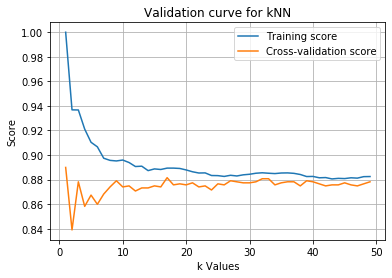

In [13]:
plot_knn_validation_curve(cf_knn_1,X_train, y_train,'knn_validation_curve_1-100.png')

In [14]:
clf_knn_best_param_1 = set_knn_hyperparameters(cf_knn_1,X_train, y_train)

Best Parameters:  {'n_neighbors': 9}
Accuracy : 88.0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')


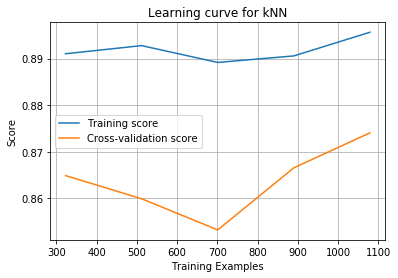

In [15]:
plot_knn_learning_curve(clf_knn_best_param_1, X_train, y_train,'knn_learning_curve_1-100.png')

In [16]:
X_train, X_test, y_train, y_test = train_test(X_ds2, y_ds2)

In [17]:
cf_knn_2 = knn_learner(X_train, X_test, y_train, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


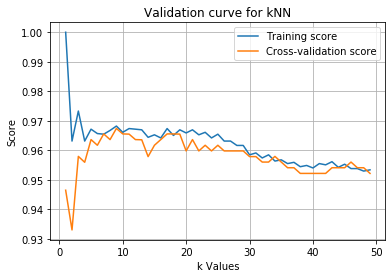

In [18]:
plot_knn_validation_curve(cf_knn_2,X_train, y_train,'knn_validation_curve_2-100.png')

In [19]:
clf_knn_best_param_2 = set_knn_hyperparameters(cf_knn_2, X_train, y_train)

Best Parameters:  {'n_neighbors': 7}
Accuracy : 97.71428571428571


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')


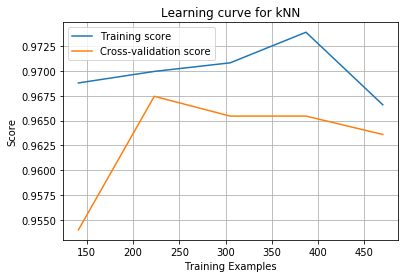

In [20]:
plot_knn_learning_curve(clf_knn_best_param_2, X_train, y_train,'knn_learning_curve_1-100.png')

In [26]:
np.linspace(1,60,10).astype('int')

array([ 1,  7, 14, 20, 27, 33, 40, 46, 53, 60])